<a href="https://colab.research.google.com/github/DaisukeYoshioka99/DataAnalysis/blob/master/HMM_GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Use data analyzed with pre-2020 versions of Fiji.

In [ ]:
!python --version

Python 3.10.12


In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


google drive

In [ ]:
import os

os.chdir("/content/drive/My Drive/")


In [ ]:
ls

Spot_test.csv  Stat_test.csv


Hyperparameters

In [ ]:
import numpy as np

# Frame rate (sec)
dt = 1/30.0

# um/pixel
D_unit = 0.1

# Lower limit of the number of tracking frames (minimum is 2)
min = 2

# Number of diffusion states
statenum = 3

# Initial probability of each state : π
pi_i = np.array([0.3, 0.5, 0.2])
print(pi_i)
print("")

# Initial state transition probability matrix : A
A_i = np.array([[1.0/3.0, 1.0/3.0, 1.0/3.0], [1.0/3.0, 1.0/3.0, 1.0/3.0], [1.0/3.0, 1.0/3.0, 1.0/3.0]])
print(A_i)
print("")

# Initial diffusion coefficient of each state : D
D_i = np.array([0.1, 0.01, 0.001])
print(D_i)
print("")


[0.3 0.5 0.2]

[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]

[0.1   0.01  0.001]



Import uploaded CSV (for TrackMate)

In [ ]:
import matplotlib.pyplot as pp
import pandas as pd
import glob

Name_spot = glob.glob('Spot_*.csv')
Name_stat = glob.glob('Stat_*.csv')

csvdata_2 = pd.read_csv(str(Name_stat[0]),delimiter=',', dtype=None)

### csv file (TrackMate) Data reading ###
csvdata_i = pd.read_csv(str(Name_spot[0]),delimiter=',', dtype=None)
csvdata_2=csvdata_2[csvdata_2['TRACK_DURATION']>=min-1]

csvdata_0 = pd.DataFrame([])
ID=np.zeros(csvdata_2.shape[0])
for id_i in range(csvdata_2.shape[0]):
  ID[id_i]=int(csvdata_2['Label'].iloc[id_i][6:])
  csvdata_0 = pd.concat([ csvdata_0, csvdata_i[csvdata_i['TRACK_ID']==ID[id_i]] ])

## Convert pdDataFrame to ndArray
csvdata = np.zeros([csvdata_0.shape[0],7])
csvdata[:,1]=np.array(csvdata_0["FRAME"])
csvdata[:,2]=np.array(csvdata_0["POSITION_X"])
csvdata[:,3]=np.array(csvdata_0["POSITION_Y"])
csvdata[:,4]=np.array(csvdata_0["TOTAL_INTENSITY"])
csvdata[:,5]=np.array(csvdata_0["TRACK_ID"])
csvdata[:,6]=np.array(csvdata_0["ESTIMATED_DIAMETER"])

zi=0
zikan=csvdata[csvdata[:,5]==ID[zi],1]-csvdata[csvdata[:,5]==ID[zi],1][0]
for zi in range(1, len(ID)):
  zikan=np.r_[zikan,csvdata[csvdata[:,5]==ID[zi],1]-csvdata[csvdata[:,5]==ID[zi],1][0]]

csvdata[:,0]=zikan


In [ ]:
csvdata_0

Label     ID  TRACK_ID   QUALITY  POSITION_X  POSITION_Y  POSITION_Z  \
0      ID53412  53412         0   815.543     106.011     186.753           0   
1      ID53383  53383         0  1150.948     106.339     186.379           0   
2      ID53322  53322         0  1250.611     106.128     186.383           0   
3      ID53505  53505         0   997.268     106.132     186.563           0   
4      ID53536  53536         0  1091.014     105.970     186.636           0   
...        ...    ...       ...       ...         ...         ...         ...   
27556  ID83591  83591      2558   940.158      82.063     185.981           0   
27557  ID83534  83534      2559   526.626     209.725     199.868           0   
27558  ID83555  83555      2559   798.766     209.347     199.698           0   
27559  ID83574  83574      2559  1396.800     209.491     199.542           0   
27560  ID83596  83596      2559   878.956     209.696     199.836           0   

       POSITION_T  FRAME  RADIUS  ...  MANUAL_COLOR  MEAN_INTENSITY  \
0               0      0    2.25  ...     -10921639        1791.571   
1               1      1    2.25  ...     -10921639        2201.810   
2               2      2    2.25  ...     -10921639        2270.762   
3               3      3    2.25  ...     -10921639        1882.333   
4               4      4    2.25  ...     -10921639        1963.048   
...           ...    ...     ...  ...           ...             ...   
27556        1199   1199    2.25  ...     -10921639        1958.381   
27557        1196   1196    2.25  ...     -10921639        1196.286   
27558        1197   1197    2.25  ...     -10921639        1526.000   
27559        1198   1198    2.25  ...     -10921639        2721.000   
27560        1199   1199    2.25  ...     -10921639        1792.952   

       MEDIAN_INTENSITY  MIN_INTENSITY  MAX_INTENSITY  TOTAL_INTENSITY  \
0                  1384            406           4737            37623   
1                  1832            636           5099            46238   
2                  1904            553           4537            47686   
3                  1677            224           4330            39529   
4                  2000             97           3881            41224   
...                 ...            ...            ...              ...   
27556              1601            530           4115            41126   
27557              1000            271           2897            25122   
27558              1542            252           3880            32046   
27559              2773            808           5971            57141   
27560              1804            540           3181            37652   

       STANDARD_DEVIATION  ESTIMATED_DIAMETER  CONTRAST    SNR  
0                1249.256               2.250     0.644  1.124  
1                1267.835               2.250     0.636  1.351  
2                1322.085               2.250     0.632  1.331  
3                1142.158               2.250     0.588  1.220  
4                1174.318               2.250     0.641  1.306  
...                   ...                 ...       ...    ...  
27556            1082.635               2.250     0.432  1.091  
27557             753.100               3.150     0.520  1.087  
27558             937.070               2.250     0.595  1.215  
27559            1489.484               3.150     0.674  1.470  
27560             745.772               4.357     0.605  1.813  

[27561 rows x 21 columns]

In [ ]:
csvdata_2

Label  NUMBER_SPOTS  NUMBER_GAPS  LONGEST_GAP  NUMBER_SPLITS  \
0        Track_0          1200            0            0              0   
1        Track_1            26            0            0              0   
2        Track_2            56            0            0              0   
3        Track_3            56            0            0              0   
4        Track_4            11            0            0              0   
...          ...           ...          ...          ...            ...   
2555  Track_2555             2            0            0              0   
2556  Track_2556             3            0            0              0   
2557  Track_2557             4            0            0              0   
2558  Track_2558             2            0            0              0   
2559  Track_2559             4            0            0              0   

      NUMBER_MERGES  NUMBER_COMPLEX  TRACK_DURATION  TRACK_START  TRACK_STOP  \
0                 0               0            1199            0        1199   
1                 0               0              25            0          25   
2                 0               0              55            0          55   
3                 0               0              55            0          55   
4                 0               0              10            0          10   
...             ...             ...             ...          ...         ...   
2555              0               0               1         1180        1181   
2556              0               0               2         1197        1199   
2557              0               0               3         1196        1199   
2558              0               0               1         1198        1199   
2559              0               0               3         1196        1199   

      ...  TRACK_MEAN_SPEED  TRACK_MAX_SPEED  TRACK_MIN_SPEED  \
0     ...             0.294            0.823            0.004   
1     ...             0.375            0.722            0.051   
2     ...             0.516            1.406            0.068   
3     ...             0.531            1.503            0.085   
4     ...             0.370            0.615            0.115   
...   ...               ...              ...              ...   
2555  ...             0.386            0.386            0.386   
2556  ...             0.435            0.594            0.275   
2557  ...             0.312            0.401            0.233   
2558  ...             0.511            0.511            0.511   
2559  ...             0.328            0.415            0.212   

      TRACK_MEDIAN_SPEED  TRACK_STD_SPEED  TRACK_MEAN_QUALITY  \
0                  0.269            0.154            1488.542   
1                  0.350            0.179             950.022   
2                  0.407            0.329             895.527   
3                  0.421            0.333            1306.062   
4                  0.344            0.166             943.231   
...                  ...              ...                 ...   
2555               0.386              NaN             664.072   
2556               0.594            0.225             554.992   
2557               0.302            0.084             714.342   
2558               0.511              NaN             778.135   
2559               0.358            0.105             900.287   

      TRACK_MAX_QUALITY  TRACK_MIN_QUALITY  TRACK_MEDIAN_QUALITY  \
0              2479.693            508.640              1493.711   
1              1399.039            578.758               940.062   
2              1286.382            653.308               887.180   
3              2163.420            577.912              1251.717   
4              1326.767            542.519               932.053   
...                 ...                ...                   ...   
2555            726.150            601.994               726.150   
2556            594.373            527.821 

Creation of data frame for analysis

In [ ]:
df = pd.DataFrame([])
df["Data No."] = csvdata_0["TRACK_ID"]
df["Index"] = csvdata[:,0]
df["X Position(pixels)"] = csvdata[:,2]
df["Y Position(pixels)"] = csvdata[:,3]

df["Data No."] = df["Data No."].astype("int")
df["Data No."]=df["Data No."]+1
df["Index"] = df["Index"].astype("int")

In [ ]:
for i in range(len(df.index)-1):
  if df["Data No."].values[i+1] - df["Data No."].values[i] != 1:
    if df["Index"].values[i+1] < df["Index"].values[i]:
      df["Data No."].values[i+1] = df["Data No."].values[i] + 1
    else:
      df["Data No."].values[i+1] = df["Data No."].values[i]
  else:
    if df["Index"].values[i+1] > df["Index"].values[i]:
      df["Data No."].values[i+1] = df["Data No."].values[i]
    else:
      pass

df.index = range(df.shape[0])

In [ ]:
df["FRAME"]=csvdata_0["FRAME"]
df["ESTIMATED_DIAMETER"]=csvdata_0["ESTIMATED_DIAMETER"]
df["TOTAL_INTENSITY"]=csvdata_0["TOTAL_INTENSITY"]
df

Data No.  Index  X Position(pixels)  Y Position(pixels)  FRAME  \
0             1      0             106.011             186.753      0   
1             1      1             106.339             186.379      1   
2             1      2             106.128             186.383      2   
3             1      3             106.132             186.563      3   
4             1      4             105.970             186.636      4   
...         ...    ...                 ...                 ...    ...   
27556      2559      1              82.063             185.981   1199   
27557      2560      0             209.725             199.868   1196   
27558      2560      1             209.347             199.698   1197   
27559      2560      2             209.491             199.542   1198   
27560      2560      3             209.696             199.836   1199   

       ESTIMATED_DIAMETER  TOTAL_INTENSITY  
0                   2.250            37623  
1                   2.250            46238  
2                   2.250            47686  
3                   2.250            39529  
4                   2.250            41224  
...                   ...              ...  
27556               2.250            41126  
27557               3.150            25122  
27558               2.250            32046  
27559               3.150            57141  
27560               4.357            37652  

[27561 rows x 7 columns]

In [ ]:
for i in range(1, df["Data No."].iloc[-1]+1):
  dx = np.asarray(df[df['Data No.']==i].iloc[1:,2])-np.asarray(df[df['Data No.']==i].iloc[:-1,2])
  dy = np.asarray(df[df['Data No.']==i].iloc[1:,3])-np.asarray(df[df['Data No.']==i].iloc[:-1,3])
  if np.sum(np.sqrt(dx**2+dy**2)==0)==0:
    pass
  else:
    df=df.drop(df.index[df['Data No.']==i])
    print(i)


In [ ]:
for i in range(len(df.index)-1):
  if df["Data No."].values[i+1] - df["Data No."].values[i] != 1:
    if df["Index"].values[i+1] < df["Index"].values[i]:
      df["Data No."].values[i+1] = df["Data No."].values[i] + 1
    else:
      df["Data No."].values[i+1] = df["Data No."].values[i]
  else:
    if df["Index"].values[i+1] > df["Index"].values[i]:
      df["Data No."].values[i+1] = df["Data No."].values[i]
    else:
      pass

df.index = range(df.shape[0])

In [ ]:
df

Data No.  Index  X Position(pixels)  Y Position(pixels)  FRAME  \
0             1      0             106.011             186.753      0   
1             1      1             106.339             186.379      1   
2             1      2             106.128             186.383      2   
3             1      3             106.132             186.563      3   
4             1      4             105.970             186.636      4   
...         ...    ...                 ...                 ...    ...   
27556      2559      1              82.063             185.981   1199   
27557      2560      0             209.725             199.868   1196   
27558      2560      1             209.347             199.698   1197   
27559      2560      2             209.491             199.542   1198   
27560      2560      3             209.696             199.836   1199   

       ESTIMATED_DIAMETER  TOTAL_INTENSITY  
0                   2.250            37623  
1                   2.250            46238  
2                   2.250            47686  
3                   2.250            39529  
4                   2.250            41224  
...                   ...              ...  
27556               2.250            41126  
27557               3.150            25122  
27558               2.250            32046  
27559               3.150            57141  
27560               4.357            37652  

[27561 rows x 7 columns]

In [ ]:
df["X Position(um)"] = df["X Position(pixels)"] * D_unit
df["Y Position(um)"] = df["Y Position(pixels)"] * D_unit
df["dX"] = df["X Position(um)"].diff()
df.loc[df["Index"] == 0, "dX"] = np.nan
df["dY"] = df["Y Position(um)"].diff()
df.loc[df["Index"] == 0, "dY"] = np.nan
df["dR^2"] = df["dX"] ** 2 + df["dY"] ** 2
df["dR"] = np.sqrt(df["dR^2"])

Obtain indexes of the start and end points of each trajectory

In [ ]:
#startpoint = df[df["Index"] == 1].index.values
startpoint = np.arange(df.shape[0])[df["Index"] == 1]
endpoint = startpoint[1:] - 2
#terminus = len(df.index) - 1
terminus = df.shape[0] - 1
endpoint = np.append(endpoint, terminus)
length = endpoint - startpoint
print(length)

[1198   24   54 ...    2    0    2]


Matrix generation for Baum-Welch algorithm

In [ ]:
tracknum = df["Data No."].max()
maxlength = df["Index"].max()

alpha = np.zeros((maxlength, statenum, tracknum))
beta = np.zeros((maxlength, statenum, tracknum))
gamma = np.zeros((maxlength, statenum, tracknum))
xi = np.zeros((maxlength, statenum, statenum, tracknum))
B = np.zeros((maxlength, statenum, tracknum))
v = np.zeros((statenum))
uv = np.zeros((statenum, statenum))
C = np.zeros((maxlength, tracknum))

In [ ]:
dR = np.zeros((maxlength, statenum, tracknum))
dR2 = np.zeros((maxlength, statenum, tracknum))

for i in range(0, tracknum):
  for n in range(0, length[i]+1):
    dR[n,:,i] = df["dR"].values[startpoint[i]+n]
    dR2[n,:,i] = df["dR^2"].values[startpoint[i]+n]

Cython

In [ ]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


EM algorithm

In [ ]:
%%cython
import numpy as np
cimport numpy as np
cimport cython
from libc.math cimport exp
from libc.math cimport abs
from libc.math cimport log

def DCEM_cython(double[::1] pi, double[::1] D, double[:,:,::1] dR, double[:,:,::1] dR2, long[::1] length, long maxlength,
                long tracknum, long statenum, double dt, double[:,:,::1] gamma, double[:,::1] C, double[:,:,::1] B):

    cdef long i, j, j1, j2, k
    cdef double partial_sum = 0.0
    cdef double AIC = 0.0
    cdef double epsilon = 1.0
    cdef double loglikelihood = 10.0
    cdef double partial_state, partial_sum1, partial_sum2, ploglikelihood
    cdef double[::1] ppi, pD
    cdef double[:,:,::1] dR2gamma

    dR2gamma = B.copy()

    while epsilon > 0.00001:

      ppi = pi.copy()
      pD = D.copy()
      ploglikelihood = loglikelihood

      # E-step
      for k in range(0, tracknum):

        # Initialization of C
        for i in range(length[k]+1):
          C[i,k] = 0.0

        # Calculation of gamma
        for i in range(0, length[k]+1):
          for j in range(statenum):
            gamma[i,j,k] = pi[j] * 2*dR[i,j,k]*(exp(-(dR2[i,j,k])/(4*D[j]*dt))) / (4*D[j]*dt)
            C[i,k] += gamma[i,j,k]

          for j in range(statenum):
            gamma[i,j,k] /= C[i,k]

      # M-step

      # Calculation of pi
      partial_sum = 0.0
      for j in range(statenum):
        partial_state = 0.0
        for i in range(maxlength):
          for k in range(tracknum):
            partial_state += gamma[i,j,k]
        pi[j] = partial_state
        partial_sum += partial_state

      for j in range(statenum):
        pi[j] /= partial_sum

      # Calculation of D
      for i in range(maxlength):
        for j in range(statenum):
          for k in range(tracknum):
            dR2gamma[i,j,k] = dR2[i,j,k] * gamma[i,j,k]

      for j in range(statenum):
        partial_sum1 = 0.0
        partial_sum2 = 0.0
        for i in range(maxlength):
          for k in range(tracknum):
            partial_sum1 += dR2gamma[i,j,k]
            partial_sum2 += gamma[i,j,k] # sum(γk) = Nk : Data number of k-state
        D[j] = partial_sum1 / (partial_sum2 * 4 * dt)

      # Calculation of epsilon
      loglikelihood = 0.0
      for k in range(tracknum):
        for i in range(length[k]+1):
          loglikelihood += log(C[i,k])

      epsilon = abs(ploglikelihood - loglikelihood)

    AIC = -2 * loglikelihood + 2 * statenum -1

    return pi, D, gamma, epsilon, AIC

Matrix generation for EM algorithm

In [ ]:
tracknum = df["Data No."].max()
maxlength = df["Index"].max()

gamma = np.zeros((maxlength, statenum, tracknum))
B = np.zeros((maxlength, statenum, tracknum))
C = np.zeros((maxlength, tracknum))

Calculation

In [ ]:
import time
start = time.time()

pi, D, gamma, epsilon, AIC = DCEM_cython(pi_i, D_i, dR, dR2, length, maxlength, tracknum, statenum, dt, gamma, C, B)

print(np.asarray(pi))
print("")
print(np.asarray(D))
print("")
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")


[0.10090045 0.39011758 0.50898196]

[0.09475913 0.02772287 0.01066464]

elapsed_time:272.2460699081421[sec]


File download

In [ ]:
filename = Name_spot[0][4:]
filename


'_test.csv'

In [ ]:
index=np.array([np.argsort(D)[::-1]])

arrayset = pd.DataFrame(index = ["pi", "D", "tracknum", "stepnum"], columns = ["1", "2", "3"])
arrayset.loc["pi", "1":"3"] = np.asarray(pi)[index]
arrayset.loc["D", "1":"3"] = np.asarray(D)[index]
arrayset.loc["tracknum", "1"] = tracknum
arrayset.loc["stepnum", "1"] = len(df.index)-1

arrayset

1         2         3
pi          0.1009  0.390118  0.508982
D         0.094759  0.027723  0.010665
tracknum      2560       NaN       NaN
stepnum      27560       NaN       NaN

In [ ]:
arrayset = pd.DataFrame(index = [filename], columns = ["pi1", "pi2", "pi3", "D1", "D2", "D3", "tracknum", "stepnum"])
arrayset.loc[filename, "pi1":"pi3"] = np.asarray(pi)[index]
arrayset.loc[filename, "D1":"D3"] = np.asarray(D)[index]
arrayset.loc[filename, "tracknum"] = tracknum
arrayset.loc[filename, "stepnum"] = len(df.index)-1

arrayset

pi1       pi2       pi3        D1        D2        D3 tracknum  \
_test.csv  0.1009  0.390118  0.508982  0.094759  0.027723  0.010665     2560   

          stepnum  
_test.csv   27560

Save

In [ ]:
arrayset.to_csv("Pdf" + filename)


Figure

[array([0.04974535, 0.02110379, 0.01800444, ..., 0.04144683, 0.02123017,
       0.03584146])]


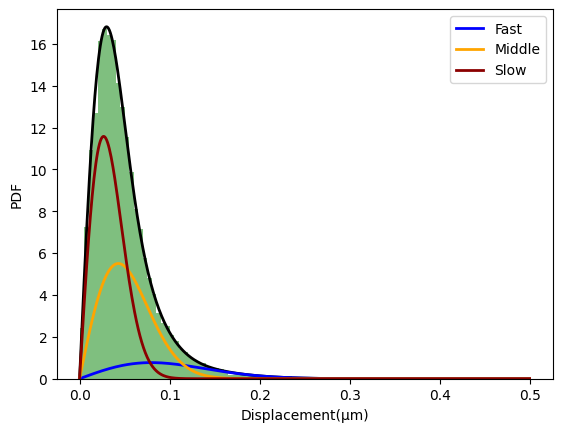

In [ ]:
import matplotlib.pyplot as plt

ydR = []
ydR.append(df["dR"].dropna().values)
print(ydR)

pipy = np.asarray(pi)
Dpy = np.asarray(D)

x = np.arange(0, 0.5, 0.001)

ymodelpy = 0
for i in range(statenum):
  ymodelpy += (pipy[i]*2*x*np.exp(-(x**2)/(4*Dpy[i]*dt)))/(4*Dpy[i]*dt)

histresult = plt.hist(ydR, range=[0, 0.5], bins=100,  color='green', alpha=0.5, density=1)
plt.plot(x, ymodelpy, color='black', linewidth=2.0)

c = ['blue', 'orange', 'darkred']
l = ['Fast', 'Middle', 'Slow']
for i in range(statenum):
  ymodelpy_state = (pipy[i]*2*x*np.exp(-(x**2)/(4*Dpy[i]*dt)))/(4*Dpy[i]*dt)
  plt.plot(x, ymodelpy_state, color=c[i], linewidth=2.0, label=l[i])

plt.xlabel("Displacement(µm)")
plt.ylabel("PDF")
plt.legend()

plt.show()

In [ ]:
AIC

-109790.45648535718

Baum-Welch algorithm

In [ ]:
%%cython
import numpy as np
cimport numpy as np
cimport cython
from libc.math cimport exp
from libc.math cimport log
from libc.math cimport abs

def baumwelch_cython(double[::1] pi, double[:,::1] A, double[::1] D, double[:,:,::1] dR, double[:,:,::1] dR2,
              long[::1] length, long maxlength, long tracknum, long statenum, double dt,
              double[:,:,::1] alpha, double[:,:,::1] beta, double[:,:,::1] gamma, double[:,:,:,::1] xi, double[:,::1] C, double[::1] v, double[:,::1] uv, double[:,:,::1] B):

    cdef long i, j, j1, j2, k
    cdef double partial_sum = 0.0
    cdef double PX = 0.0
    cdef double epsilon = 1.0
    cdef double partial_state, partial_sum1, partial_sum2, pPX # PX = likelihood
    cdef double[::1] ppi, w, x
    cdef double[::1] pD
    cdef double[:,::1] pA
    cdef double[:,:,::1] dR2gamma

    dR2gamma = B.copy()
    w = v.copy()
    x = v.copy()

    while epsilon > 0.00001:

      ppi = pi.copy()
      pA = A.copy()
      pD = D.copy()

      pPX = PX

      for k in range(0, tracknum):

        # E-step
        # Initialization of C
        for i in range(length[k]+1):
          C[i,k] = 0.0

        # Calculation of B
        for i in range(length[k]+1):
          for j in range(statenum):
            B[i,j,k] = 2*dR[i,j,k]*(exp(-(dR2[i,j,k])/(4*D[j]*dt))) / (4*D[j]*dt)

        # Calculation of alpha
        for j in range(statenum):
          alpha[0,j,k] = pi[j] * B[0,j,k]
          C[0,k] += alpha[0,j,k]

        for j in range(statenum):
          alpha[0,j,k] /= C[0,k]

        for i in range(1, length[k]+1):
          for j2 in range(statenum):
            partial_sum = 0.0
            for j1 in range(statenum):
              partial_sum += alpha[i-1,j1,k] * A[j1,j2]
            v[j2] = partial_sum

          for j in range(statenum):
            alpha[i,j,k] = B[i,j,k] * v[j]
            C[i,k] += alpha[i,j,k]

          for j in range(statenum):
            alpha[i,j,k] /= C[i,k]

        # Calculation of beta
        for j in range(statenum):
          beta[length[k],j,k] = 1.0

        for i in range(length[k]-1, -1, -1):

          for j in range(statenum):
            w[j] = B[i+1,j,k] * beta[i+1,j,k]

          for j2 in range(statenum):
            partial_sum = 0.0
            for j1 in range(statenum):
              partial_sum += w[j1] * A.T[j1,j2]
            beta[i,j2,k] = partial_sum / C[i+1,k]

        # Calculation of xi
        for i in range(0, length[k]):

          for j in range(statenum):
            x[j] = B[i+1,j,k] * beta[i+1,j,k]

          for j1 in range(statenum):
            for j2 in range(statenum):
              uv[j1,j2] = alpha[i,j1,k] * x[j2]  ## .T

          for j1 in range(statenum):
            for j2 in range(statenum):
              xi[i,j1,j2,k] = (uv[j1,j2] * A[j1,j2]) / C[i+1, k]

      # Calculation of gamma
      for i in range(maxlength):
        for j in range(statenum):
          for k in range(tracknum):
            gamma[i,j,k] = alpha[i,j,k] * beta[i,j,k]


      # M-step

      # Calculation of pi
      partial_sum = 0.0
      for j in range(statenum):
        partial_state = 0.0
        for k in range(tracknum):
          partial_state += gamma[0,j,k]
        pi[j] = partial_state
        partial_sum += partial_state

      for j in range(statenum):
        pi[j] /= partial_sum

      # Calculation of A
      for j1 in range(statenum):
        for j2 in range(statenum):
          partial_sum = 0.0
          for i in range(maxlength):
            for k in range(tracknum):
              partial_sum += xi[i,j1,j2,k]
          A[j1,j2] = partial_sum

      for j1 in range(statenum):
        partial_sum = 0.0
        for j2 in range(statenum):
          partial_sum += A[j1,j2]
        for j2 in range(statenum):
          A[j1,j2] /= partial_sum

      # Calculation of D
      for i in range(maxlength):
        for j in range(statenum):
          for k in range(tracknum):
            dR2gamma[i,j,k] = dR2[i,j,k] * gamma[i,j,k]

      for j in range(statenum):
        partial_sum1 = 0.0
        partial_sum2 = 0.0
        for i in range(maxlength):
          for k in range(tracknum):
            partial_sum1 += dR2gamma[i,j,k] # sum(γk*X^2)
            partial_sum2 += gamma[i,j,k] # sum(γk) = Nk
        D[j] = partial_sum1 / (partial_sum2 * 4 * dt)

      # Calculation of epsilon
      epsilon = 0.0

      for j1 in range(statenum):
        epsilon += abs(ppi[j1] - pi[j1])
        epsilon += abs(pD[j1] - D[j1])
        for j2 in range(statenum):
          epsilon += abs(pA[j1,j2] - A[j1,j2])

    return pi, A, D, alpha, beta, gamma, xi, C, epsilon

Calculation

In [ ]:
import time
start = time.time()


epsilon = 1.0
pi, A, D, alpha, beta, gamma, xi, C, epsilon = baumwelch_cython(pi_i, A_i, D_i, dR, dR2, length, maxlength, tracknum, statenum, dt, alpha, beta, gamma, xi, C, v, uv, B)

print(np.asarray(pi))
print(np.asarray(A))
print(np.asarray(D))

elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(np.around(elapsed_time,3)) + " sec")


[0.36079383 0.590053   0.04915316]
[[9.19952615e-01 8.00473450e-02 4.04116394e-08]
 [1.55928516e-02 9.46997560e-01 3.74095889e-02]
 [6.22860731e-16 3.60678863e-02 9.63932114e-01]]
[0.0757341  0.02087572 0.00843159]
elapsed_time:37.428 sec


Viterbi algorithm

In [ ]:
df["State"] = np.nan

for i in range(0, tracknum):
  for n in range(0, length[i]+1):
    df["State"].values[startpoint[i]+n] = np.asarray(gamma[n,:,i]).argmax(axis=0)


Figure

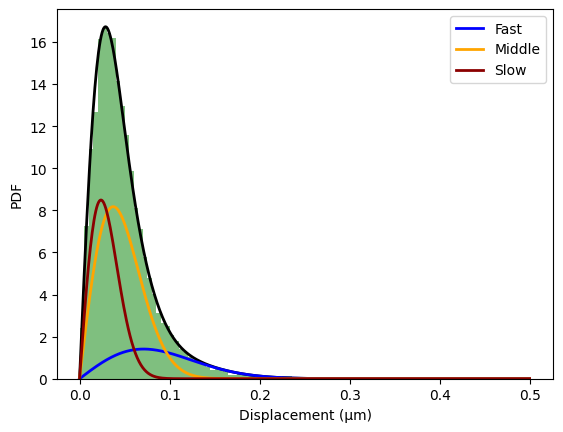

In [ ]:
import matplotlib.pyplot as plt

ydR = []
ydR.append(df["dR"].dropna().values)

pipy = np.sum(np.asarray(gamma[:,:,:]), axis=(0, 2)) / np.sum(np.asarray(gamma[:, :, :]))
Dpy = np.asarray(D)

x = np.arange(0, 0.5, 0.001)

ymodelpy = 0
for i in range(statenum):
  ymodelpy += (pipy[i]*2*x*np.exp(-(x**2)/(4*Dpy[i]*dt)))/(4*Dpy[i]*dt)

histresult = plt.hist(ydR, range=[0, 0.5], bins=100,  color='green', alpha=0.5, density=1)
plt.plot(x, ymodelpy, color='black', linewidth=2.0)

c = ['blue', 'orange', 'darkred']
l = ['Fast', 'Middle', 'Slow']
for i in range(statenum):
  ymodelpy_state = (pipy[i]*2*x*np.exp(-(x**2)/(4*Dpy[i]*dt)))/(4*Dpy[i]*dt)
  plt.plot(x, ymodelpy_state, color=c[i], linewidth=2.0, label=l[i])

plt.xlabel("Displacement (µm)")
plt.ylabel("PDF")
plt.legend()

plt.show()


In [ ]:
np.asarray(pi)

array([0.36079383, 0.590053  , 0.04915316])

In [ ]:
pipy

array([0.16515397, 0.5028606 , 0.33198543])

In [ ]:
Dpy

array([0.0757341 , 0.02087572, 0.00843159])

In [ ]:
np.asarray(A)

array([[9.19952615e-01, 8.00473450e-02, 4.04116394e-08],
       [1.55928516e-02, 9.46997560e-01, 3.74095889e-02],
       [6.22860731e-16, 3.60678863e-02, 9.63932114e-01]])

In [ ]:
x = df['Data No.']
y = df['State']
df['Duration'] = y.groupby(((y != y.shift())|(x != x.shift())).cumsum()).cumcount() + 1
df.loc[df["Index"] == 0, 'Duration'] = np.nan

Calculation of the start and end points for each trajectory of each state

In [ ]:
from bokeh.plotting import figure
from bokeh.io import output_notebook
from bokeh.io import show

startpoint1 = df[(df["State"] == 0)&(df["Duration"] == 1)].index.values
startpoint2 = df[(df["State"] == 1)&(df["Duration"] == 1)].index.values
startpoint3 = df[(df["State"] == 2)&(df["Duration"] == 1)].index.values

shiftpoint = df[df["State"] != df["State"].shift()].index.values
shiftpoint = shiftpoint[1:] -1

pointnan = df[df["Duration"].isnull()].index.values

set_ab = set(shiftpoint) - set(pointnan)
endpoint123 = list(set_ab)
endpoint123.sort()
terminus = df.shape[0] - 1
endpoint123 = np.append(endpoint123, terminus)

startpoint123 = df[df["Duration"] == 1].index.values

length123 = endpoint123 - startpoint123

stateorder = [df["State"].values[i] for i in startpoint123]

length1 = [length123[i] for i in range(len(length123)) if stateorder[i] ==0]
length2 = [length123[i] for i in range(len(length123)) if stateorder[i] ==1]
length3 = [length123[i] for i in range(len(length123)) if stateorder[i] ==2]

In [ ]:
X1 = []
Y1 = []

for i in range(0, len(length1)):
  Xtemp = []
  Ytemp = []
  for n in range(0, length1[i]+2):
    Xtemp.append(df["X Position(um)"].values[startpoint1[i]-1+n])
    Ytemp.append(df["Y Position(um)"].values[startpoint1[i]-1+n])
  X1.append(Xtemp)
  Y1.append(Ytemp)

X2 = []
Y2 = []

for i in range(0, len(length2)):
  Xtemp = []
  Ytemp = []
  for n in range(0, length2[i]+2):
    Xtemp.append(df["X Position(um)"].values[startpoint2[i]-1+n])
    Ytemp.append(df["Y Position(um)"].values[startpoint2[i]-1+n])
  X2.append(Xtemp)
  Y2.append(Ytemp)

X3 = []
Y3 = []

for i in range(0, len(length3)):
  Xtemp = []
  Ytemp = []
  for n in range(0, length3[i]+2):
    Xtemp.append(df["X Position(um)"].values[startpoint3[i]-1+n])
    Ytemp.append(df["Y Position(um)"].values[startpoint3[i]-1+n])
  X3.append(Xtemp)
  Y3.append(Ytemp)

In [ ]:

output_notebook()

#p = figure(x_range=[0, 90*D_unit], y_range=[0, 45*D_unit], width=1600, height=800)
p = figure(width=1600, height=800)

p.multi_line(X1, Y1, color="cornflowerblue", alpha=1.0, line_width=1.0)
p.multi_line(X2, Y2, color="gold", alpha=1.0, line_width=1.0)
p.multi_line(X3, Y3, color="red", alpha=1.0, line_width=1.0)

for i in range(len(X1)):
  p.scatter(X1[i], Y1[i], marker='o', size=2.0, color="cornflowerblue", alpha=1.0, line_width=1.0)

for i in range(len(X2)):
  p.scatter(X2[i], Y2[i], marker='o', size=2.0, color="gold", alpha=1.0, line_width=1.0)

for i in range(len(X3)):
  p.scatter(X3[i], Y3[i], marker='o', size=2.0, color="red", alpha=1.0, line_width=1.0)

p.background_fill_color='black'
p.background_fill_alpha=1.0

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

show(p)


In [ ]:
df['Long'] = df['Data No.'].value_counts()
df['Length'] = 0

for i in range(len(df.index)):
  df.iloc[i,df.columns.get_loc("Length")] = df.iloc[df.iloc[i,0],df.columns.get_loc("Long")]

In [ ]:
state1 = df[(df['State']==0)&(df['Length'] > 1)]
state2 = df[(df['State']==1)&(df['Length'] > 1)]
state3 = df[(df['State']==2)&(df['Length'] > 1)]

df['DurationHist1'] = state1['Duration'].value_counts()
df['DurationHist2'] = state2['Duration'].value_counts()
df['DurationHist3'] = state3['Duration'].value_counts()

df['DurationHist1'] = df['DurationHist1'] - df['DurationHist1'].shift(-1)
df['DurationHist2'] = df['DurationHist2'] - df['DurationHist2'].shift(-1)
df['DurationHist3'] = df['DurationHist3'] - df['DurationHist3'].shift(-1)

df['Time'] = df.index * dt

df

Data No.  Index  X Position(pixels)  Y Position(pixels)  FRAME  \
0             1      0             106.011             186.753      0   
1             1      1             106.339             186.379      1   
2             1      2             106.128             186.383      2   
3             1      3             106.132             186.563      3   
4             1      4             105.970             186.636      4   
...         ...    ...                 ...                 ...    ...   
27556      2559      1              82.063             185.981   1199   
27557      2560      0             209.725             199.868   1196   
27558      2560      1             209.347             199.698   1197   
27559      2560      2             209.491             199.542   1198   
27560      2560      3             209.696             199.836   1199   

       ESTIMATED_DIAMETER  TOTAL_INTENSITY  X Position(um)  Y Position(um)  \
0                   2.250            37623         10.6011         18.6753   
1                   2.250            46238         10.6339         18.6379   
2                   2.250            47686         10.6128         18.6383   
3                   2.250            39529         10.6132         18.6563   
4                   2.250            41224         10.5970         18.6636   
...                   ...              ...             ...             ...   
27556               2.250            41126          8.2063         18.5981   
27557               3.150            25122         20.9725         19.9868   
27558               2.250            32046         20.9347         19.9698   
27559               3.150            57141         20.9491         19.9542   
27560               4.357            37652         20.9696         19.9836   

           dX  ...      dR^2        dR  State  Duration    Long  Length  \
0         NaN  ...       NaN       NaN    NaN       NaN     NaN    1200   
1      0.0328  ...  0.002475  0.049745    1.0       1.0  1200.0    1200   
2     -0.0211  ...  0.000445  0.021104    2.0       1.0    26.0    1200   
3      0.0004  ...  0.000324  0.018004    2.0       2.0    56.0    1200   
4     -0.0162  ...  0.000316  0.017769    2.0       3.0    56.0    1200   
...       ...  ...       ...       ...    ...       ...     ...     ...   
27556  0.0502  ...  0.002612  0.051110    1.0       1.0     NaN       2   
27557     NaN  ...       NaN       NaN    NaN       NaN     NaN       4   
27558 -0.0378  ...  0.001718  0.041447    1.0       1.0     NaN       4   
27559  0.0144  ...  0.000451  0.021230    1.0       2.0     NaN       4   
27560  0.0205  ...  0.001285  0.035841    1.0       3.0     NaN       4   

       DurationHist1  DurationHist2  DurationHist3        Time  
0                NaN            NaN            NaN    0.000000  
1              255.0          756.0            6.0    0.033333  
2              166.0          393.0           10.0    0.066667  
3              118.0          211.0           14.0    0.100000  
4               72.0          146.0           11.0    0.133333  
...              ...            ...            ...         ...  
27556            NaN            NaN            NaN  918.533333  
27557            NaN            NaN            NaN  918.566667  
27558            NaN            NaN            NaN  918.600000  
27559            NaN            NaN            NaN  918.633333  
27560            NaN            NaN            NaN  918.666667  

[27561 rows x 21 columns]

Save

In [ ]:
df.to_csv("state" + filename)


In [ ]:
index=np.array([np.argsort(D)[::-1]])

arrayset = pd.DataFrame(index = ["pi","gamma", "A 1->", "A 2->", "A 3->", "D"], columns = ["1", "2", "3"])
arrayset.loc["pi", "1":"3"] = np.asarray(pi)[index]
arrayset.loc["gamma", "1":"3"] = np.asarray(pipy)[index]
arrayset.loc["A 1->":"A 3->", "1":"3"] = np.asarray(A)[index.T, index]
arrayset.loc["D", "1":"3"] = np.asarray(D)[index]

arrayset


1         2         3
pi     0.360794  0.590053  0.049153
gamma  0.165154  0.502861  0.331985
A 1->  0.919953  0.080047       0.0
A 2->  0.015593  0.946998   0.03741
A 3->       0.0  0.036068  0.963932
D      0.075734  0.020876  0.008432

In [ ]:
hoge = np.copy(df["State"])
hoge


array([nan,  1.,  2., ...,  1.,  1.,  1.])

In [ ]:
state_copy = np.copy(df["State"])
for i in range(len(index[0])):
  index[0][i]
  state_copy[state_copy==index[0][i]] = -1*(i+1)

df["State"] = (-1*state_copy)-1



In [ ]:
np.array(df["State"])

array([nan,  1.,  2., ...,  1.,  1.,  1.])

In [ ]:
np.allclose(hoge, np.array(df["State"]), 0, 0, True)

# https://www.haya-programming.com/entry/2019/07/14/044816


True

In [ ]:
np.nansum(hoge - np.array(df["State"]))

0.0

In [ ]:
arrayset = pd.DataFrame(index = [filename], columns = ["pi1", "pi2", "pi3","gamma1", "gamma2", "gamma3", "D1", "D2", "D3", "A 1->1", "A 1->2", "A 1->3", "A 2->1", "A 2->2", "A 2->3", "A 3->1", "A 3->2", "A 3->3"])
arrayset.loc[filename, "pi1":"pi3"] = np.asarray(pi)[index]
arrayset.loc[filename, "gamma1":"gamma3"] = np.asarray(pipy)[index]
arrayset.loc[filename, "D1":"D3"] = np.asarray(D)[index]
arrayset.loc[filename, "A 1->1":"A 1->3"] = np.asarray(A)[index[0,0],index]
arrayset.loc[filename, "A 2->1":"A 2->3"] = np.asarray(A)[index[0,1],index]
arrayset.loc[filename, "A 3->1":"A 3->3"] = np.asarray(A)[index[0,2],index]

arrayset

pi1       pi2       pi3    gamma1    gamma2    gamma3  \
_test.csv  0.360794  0.590053  0.049153  0.165154  0.502861  0.331985   

                 D1        D2        D3    A 1->1    A 1->2 A 1->3    A 2->1  \
_test.csv  0.075734  0.020876  0.008432  0.919953  0.080047    0.0  0.015593   

             A 2->2   A 2->3 A 3->1    A 3->2    A 3->3  
_test.csv  0.946998  0.03741    0.0  0.036068  0.963932

In [ ]:
arrayset.to_csv("HMM" + filename)


MSD

In [ ]:
MSD = []
N = []

for n in range(1, df["Index"].max()+1):
  diff_df = df.diff(n)
  diff_df = diff_df[diff_df["Index"]==n]
  if diff_df.shape[0] > 0:
    MSD.append(np.mean(np.power(diff_df["X Position(um)"].values[:], 2) + np.power(diff_df["Y Position(um)"].values[:], 2)))
    N.append(len(np.power(diff_df["X Position(um)"].values[:], 2) + np.power(diff_df["Y Position(um)"].values[:], 2)))
  else:
    MSD.append(0)
    N.append(0)



MSD for each state



In [ ]:
state = 2 # diffusion state

MSD = []
N = []

for n in range(1, df["Index"].max()+1):
  diff_df = df.diff(n)
  diff_df = diff_df[(df["State"]==state) & (diff_df["Index"]==n)]
  if diff_df.shape[0] > 0:
    MSD.append(np.mean(np.power(diff_df["X Position(um)"].values[:], 2) + np.power(diff_df["Y Position(um)"].values[:], 2)))
    N.append(len(np.power(diff_df["X Position(um)"].values[:], 2) + np.power(diff_df["Y Position(um)"].values[:], 2)))
  else:
    MSD.append(0)
    N.append(0)
